In [1]:
import torch
import torchvision

import torch.nn as nn

import torchvision.transforms as transforms

from torch.optim.lr_scheduler import ReduceLROnPlateau

In [2]:
if torch.backends.mps.is_available():
    device = torch.device("mps")
    x = torch.ones(1, device=device)
    print (x)
    
elif torch.backends.cuda.is_built():
    device = torch.device("cuda")
    x = torch.ones(1, device=device)
    print (x)
    
else:
    print ("MPS device not found.")

tensor([1.], device='cuda:0')


In [ ]:
# I create a residual block which will be reused by the model class
# The residual block may change size depending on the size of the network, I will begin with the ResNET34 network and then move to the ResNET50

class ResidualBlock(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.conv1 = nn.Conv2d(
            
        )
        
        

In [ ]:
dummy1 = torch.randn(1, 3, 224, 224)  # For example, a single 224x224 RGB image
dummy1= dummy1.to(device)

conv1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=(7,7), stride=2, padding=3, device=device)
dummy1 = conv1(dummy1)
print(dummy1.shape)

mp1 = nn.MaxPool2d(kernel_size=(3,3), stride=2, padding=1)
dummy1 = mp1(dummy1)
print(dummy1.shape)

conv2 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=(3,3), stride=1, padding=1, device=device)
dummy1 = conv2(dummy1)
print(dummy1.shape)

conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=(3,3), stride=2, padding=1, device=device)
dummy1_change_dim = conv3(dummy1)
print(dummy1_change_dim.shape)

In [ ]:
dummy1.shape

In [ ]:
conv_change_dim = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=(1,1), stride=2, device=device)
dummy1_change = conv_change_dim(dummy1)
print(dummy1_change.shape)

In [ ]:
dummy1_change + dummy1_change_dim

In [25]:
class ResNet18(nn.Module):
    def __init__(self):
        super().__init__()
        
        # The first 7x7 conv layer
        self.conv0 = nn.Conv2d(
            in_channels=3, out_channels=64, 
            kernel_size=(7, 7),
            stride=2, padding=3, bias=False,
        )
        self.bn0 = nn.BatchNorm2d(num_features=64)
        self.relu0 = nn.ReLU()
        self.maxpool0 = nn.MaxPool2d(
            kernel_size=(3, 3), stride=2, padding=1,
        )
        
        # First part of first conv block
        self.conv1_1 = nn.Conv2d(
            in_channels=64, out_channels=64,
            kernel_size=(3,3),
            stride=1, padding=1, bias=False,
        )
        self.bn1_1 = nn.BatchNorm2d(num_features=64)
        self.relu1_1 = nn.ReLU()
        
        self.conv1_2 = nn.Conv2d(
            in_channels=64, out_channels=64,
            kernel_size=(3,3),
            stride=1, padding=1, bias=False,
        )
        self.bn1_2 = nn.BatchNorm2d(num_features=64)
        self.relu1_2 = nn.ReLU()
        # Second part of first conv block
        self.conv1_3 = nn.Conv2d(
            in_channels=64, out_channels=64,
            kernel_size=(3,3),
            stride=1, padding=1, bias=False,
        )
        self.bn1_3 = nn.BatchNorm2d(num_features=64)
        self.relu1_3 = nn.ReLU()
        
        self.conv1_4 = nn.Conv2d(
            in_channels=64, out_channels=64,
            kernel_size=(3,3),
            stride=1, padding=1, bias=False,
        )
        self.bn1_4 = nn.BatchNorm2d(num_features=64)
        self.relu1_4 = nn.ReLU()
        
        # First part of second conv block, this layer changes features to 128
        self.conv2_1 = nn.Conv2d(
            in_channels=64, out_channels=128,
            kernel_size=(3,3),
            stride=2, padding=1, bias=False,
        )
        self.bn2_1 = nn.BatchNorm2d(num_features=128)
        self.relu2_1 = nn.ReLU()
        
        self.conv2_2 = nn.Conv2d(
            in_channels=128, out_channels=128,
            kernel_size=(3,3),
            stride=1, padding=1, bias=False,
        )
        self.bn2_2 = nn.BatchNorm2d(num_features=128)
        self.relu2_2 = nn.ReLU()
        
        self.dim_match_conv1 = nn.Conv2d(
            in_channels=64, out_channels=128, 
            kernel_size=(1,1),
            stride=2, bias=False,
        )
        self.dim_match_bn_1 = nn.BatchNorm2d(128)
        self.dim_match_relu_1 = nn.ReLU()
        # Second part of second conv block
        self.conv2_3 = nn.Conv2d(
            in_channels=128, out_channels=128,
            kernel_size=(3,3),
            stride=1, padding=1, bias=False,
        )
        self.bn2_3 = nn.BatchNorm2d(num_features=128)
        self.relu2_3 = nn.ReLU()
        
        self.conv2_4 = nn.Conv2d(
            in_channels=128, out_channels=128,
            kernel_size=(3,3),
            stride=1, padding=1, bias=False,
        )
        self.bn2_4 = nn.BatchNorm2d(num_features=128)
        self.relu2_4 = nn.ReLU()
        
        self.relu_after_add_1 = nn.ReLU()
        
        # First part of third conv block
        self.conv3_1 = nn.Conv2d(
            in_channels=128, out_channels=256,
            kernel_size=(3,3),
            stride=2, padding=1, bias=False,
        )
        self.bn3_1 = nn.BatchNorm2d(num_features=256)
        self.relu3_1 = nn.ReLU()
        
        self.conv3_2 = nn.Conv2d(
            in_channels=256, out_channels=256,
            kernel_size=(3,3),
            stride=1, padding=1, bias=False,
        )
        self.bn3_2 = nn.BatchNorm2d(num_features=256)
        self.relu3_2 = nn.ReLU()
        
        self.dim_match_conv2 = nn.Conv2d(
            in_channels=128, out_channels=256, 
            kernel_size=(1,1),
            stride=2, bias=False,
        )
        self.dim_match_bn_2 = nn.BatchNorm2d(256)
        self.dim_match_relu_2 = nn.ReLU()
        # Second part of third conv block
        self.conv3_3 = nn.Conv2d(
            in_channels=256, out_channels=256,
            kernel_size=(3,3),
            stride=1, padding=1, bias=False,
        )
        self.bn3_3 = nn.BatchNorm2d(num_features=256)
        self.relu3_3 = nn.ReLU()
        
        self.conv3_4 = nn.Conv2d(
            in_channels=256, out_channels=256,
            kernel_size=(3,3),
            stride=1, padding=1, bias=False,
        )
        self.bn3_4 = nn.BatchNorm2d(num_features=256)
        self.relu3_4 = nn.ReLU()
        
        self.relu_after_add_2 = nn.ReLU()
        
        # First part of fourth conv block
        self.conv4_1 = nn.Conv2d(
            in_channels=256, out_channels=512,
            kernel_size=(3,3),
            stride=2, padding=1, bias=False,
        )
        self.bn4_1 = nn.BatchNorm2d(num_features=512)
        self.relu4_1 = nn.ReLU()
        
        self.conv4_2 = nn.Conv2d(
            in_channels=512, out_channels=512,
            kernel_size=(3,3),
            stride=1, padding=1, bias=False,
        )
        self.bn4_2 = nn.BatchNorm2d(num_features=512)
        self.relu4_2 = nn.ReLU()
        
        self.dim_match_conv3 = nn.Conv2d(
            in_channels=256, out_channels=512, 
            kernel_size=(1,1),
            stride=2, bias=False,
        )
        self.dim_match_bn_3 = nn.BatchNorm2d(512)
        self.dim_match_relu_3 = nn.ReLU()
        # Second part of fourth conv block
        self.conv4_3 = nn.Conv2d(
            in_channels=512, out_channels=512,
            kernel_size=(3,3),
            stride=1, padding=1, bias=False,
        )
        self.bn4_3 = nn.BatchNorm2d(num_features=512)
        self.relu4_3 = nn.ReLU()
        
        self.conv4_4 = nn.Conv2d(
            in_channels=512, out_channels=512,
            kernel_size=(3,3),
            stride=1, padding=1, bias=False,
        )
        self.bn4_4 = nn.BatchNorm2d(num_features=512)
        self.relu4_4 = nn.ReLU()
        
        self.relu_after_add_3 = nn.ReLU()
        
        # Avg pool out put and pass through a FC connected layer which has 10 outputs for CIFAR10 
        # (Change to 1000 for ImageNet)
        self.global_avg_pool = nn.AdaptiveAvgPool2d(
            output_size=(1,1)
        )
        
        # Final FC layer - 10 for CIFAR and ImageNette, 1000 for ImageNet full
        self.fc1 = nn.Linear(
            in_features=512, out_features=10
            #in_features=512, out_features=1000
        )
        
    def forward(self, x):
           
        x = self.conv0(x)
        x = self.bn0(x)
        x = self.relu0(x)
        x = self.maxpool0(x)  
        res_x = x.detach().clone()  # The x to be passed forward to the +2 layer
        #print(f'dim after init conv: {x.shape}')
        
        # First residual block of first conv block
        x = self.conv1_1(x)
        x = self.bn1_1(x)
        x = self.relu1_1(x)
        x = self.conv1_2(x)
        x = self.bn1_2(x)
        x = self.relu1_2(x)
        x = x + res_x
        # res_x = x.detach().clone()  This might be the wrong approach for making res_x
        res_x = x
        #print(f'dim after first res block in first conv block {x.shape}')
        
        # Second residual block of first conv block
        x = self.conv1_3(x)
        x = self.bn1_3(x)
        x = self.relu1_3(x)
        x = self.conv1_4(x)
        x = self.bn1_4(x)
        x = self.relu1_4(x)
        x = x + res_x
        #res_x = x.detach().clone()
        res_x = x
        #print(f'dim after second res block in first conv block {x.shape}')
        
        # First residual block of second conv block
        x = self.conv2_1(x)
        x = self.bn2_1(x)
        x = self.relu2_1(x)
        x = self.conv2_2(x)
        x = self.bn2_2(x)
        x = self.relu2_2(x)
        
        # Must perform a (1x1) conv on res_x to make the dimensions match
        res_x = self.dim_match_conv1(res_x)
        res_x = self.dim_match_bn_1(res_x)
        #print(f'dim res_x after 1x1 conv: {res_x.shape}')
        x = x + res_x
        x = self.dim_match_relu_1(x)
        #res_x = x.detach().clone()
        res_x = x
        #print(f'dim after first res block in second conv block {x.shape}')
        
        # Second residual block of second conv block
        x = self.conv2_3(x)
        x = self.bn2_3(x)
        x = self.relu2_3(x)
        x = self.conv2_4(x)
        x = self.bn2_4(x)
        x = self.relu2_4(x)
        x = x + res_x
        x = self.relu_after_add_1(x)
        #res_x = x.detach().clone()
        res_x = x
        #print(f'dim after second res block in second conv block {x.shape}')
        
        # First residual block of third conv block
        x = self.conv3_1(x)
        x = self.bn3_1(x)
        x = self.relu3_1(x)
        x = self.conv3_2(x)
        x = self.bn3_2(x)
        x = self.relu3_2(x)
        
        # Must perform a (1x1) conv on res_x to make the dimensions match
        res_x = self.dim_match_conv2(res_x)
        res_x = self.dim_match_bn_2(res_x)
        #print(f'dim res_x after 1x1 conv: {res_x.shape}')
        x = x + res_x
        x = self.dim_match_relu_2(x)
        #res_x = x.detach().clone()
        res_x = x
        #print(f'dim after first res block in third conv block {x.shape}')
        
        # Second residual block of third conv block
        x = self.conv3_3(x)
        x = self.bn3_3(x)
        x = self.relu3_3(x)
        x = self.conv3_4(x)
        x = self.bn3_4(x)
        x = self.relu3_4(x)
        x = x + res_x
        x = self.relu_after_add_2(x)
        #res_x = x.detach().clone()
        res_x = x
        #print(f'dim after second res block in third conv block {x.shape}')
        
        # First residual block of fourth conv block
        x = self.conv4_1(x)
        x = self.bn4_1(x)
        x = self.relu4_1(x)
        x = self.conv4_2(x)
        x = self.bn4_2(x)
        x = self.relu4_2(x)
        
        # Must perform a (1x1) conv on res_x to make the dimensions match
        res_x = self.dim_match_conv3(res_x)
        res_x = self.dim_match_bn_3(res_x)
        #print(f'dim res_x after 1x1 conv: {res_x.shape}')
        x = x + res_x
        x = self.dim_match_relu_3(x)
        #res_x = x.detach().clone()
        res_x = x
        #print(f'dim after first res block in fourth conv block {x.shape}')
        
        # Second residual block of third conv block
        x = self.conv4_3(x)
        x = self.bn4_3(x)
        x = self.relu4_3(x)
        x = self.conv4_4(x)
        x = self.bn4_4(x)
        x = self.relu4_4(x)
        x = x + res_x
        x = self.relu_after_add_3(x)
        # res_x = x.detach().clone()
        #print(f'dim after second res block in fourth conv block {x.shape}')
        
        x = self.global_avg_pool(x)
        #print(f'dim after global avg pool: {x.shape}')
        # Flatten after pooling to make output into a vector ready for FC layer
        x = torch.flatten(x, start_dim=1)
        #print(f'dim after flatten: {x.shape}')
        
        # Final fc layer
        x = self.fc1(x)
        #print(f'Final output dim: {x.shape}')
        
        return x

def kaiming_uniform_init(net):
    if isinstance(net, nn.Conv2d):
        nn.init.kaiming_normal_(net.weight, mode='fan_out', nonlinearity='relu')
    elif isinstance(net, nn.BatchNorm2d):
        nn.init.constant_(net.weight, 1)
        nn.init.constant_(net.bias, 0)

model = ResNet18()
model.apply(kaiming_uniform_init)
model.to(device)

ResNet18(
  (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu0): ReLU()
  (maxpool0): MaxPool2d(kernel_size=(3, 3), stride=2, padding=1, dilation=1, ceil_mode=False)
  (conv1_1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1_1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1_1): ReLU()
  (conv1_2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1_2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1_2): ReLU()
  (conv1_3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1_3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1_3): ReLU()
  (conv1_4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (b

In [ ]:
dummy = torch.randn(1, 3, 224, 224)  # For example, a single 224x224 RGB image
dummy = dummy.to(device)

out = model(dummy)

In [14]:
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader

transform = transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4914, 0.48227 ,0.4465], std=[0.2470, 0.2435, 0.2616]), 
    #Normalize using mean and std dev of cifar10
    #transforms.RandomHorizontalFlip()
])

# Load datasets
train_dataset = CIFAR10(root='./CIFAR', train=True, download=True, transform=transform)
test_dataset = CIFAR10(root='./CIFAR', train=False, download=True, transform=transform)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=4) # 256 batch size for imagenet
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=4)

Files already downloaded and verified
Files already downloaded and verified


In [15]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.005, weight_decay=0.0001, momentum=0.9)

# Define learning rate scheduler
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=3)

In [16]:
for epoch in range(35):
    model.train()  # Set model to training mode
    running_loss = 0.0
    
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    train_loss = running_loss / len(train_loader)
    print(f'Epoch [{epoch + 1}] training loss: {train_loss:.3f}')
    
    # Validation phase
    model.eval()  # Set model to evaluation mode
    val_running_loss = 0.0
    val_correct = 0
    val_total = 0
    with torch.no_grad():
        for data in test_loader:  # Assuming test_loader is used as a validation loader
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            
            val_running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()
    
    val_loss = val_running_loss / len(test_loader)
    val_accuracy = 100 * val_correct / val_total
    print(f'Epoch [{epoch + 1}] validation loss: {val_loss:.3f}, accuracy: {val_accuracy:.2f}%')
    
    # Update the LR scheduler with validation loss
    scheduler.step(val_loss)
    print(f'LR: {scheduler.get_last_lr()}')


KeyboardInterrupt: 

# Training on ImageNette

In [26]:
# Define transformations
transform = transforms.Compose(
    [transforms.Resize((224, 224)),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

TRAIN_DATA_DIR = './data/imagenette2-160/train'
TEST_DATA_DIR = './data/imagenette2-160/val'

# Load ImageNette dataset
trainset = torchvision.datasets.ImageFolder(
        TRAIN_DATA_DIR, transform=transform
    )
train_loader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True, num_workers=4)


testset= torchvision.datasets.ImageFolder(
        TEST_DATA_DIR, transform=transform
    )
test_loader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False, num_workers=4)


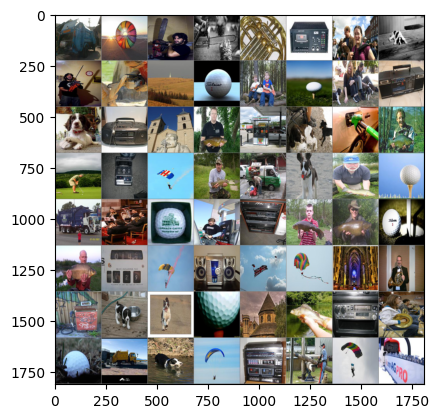

In [49]:
# Let's show some of the training images, for fun.
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image

def imshow(img):
	img = img / 2 + 0.5  # unnormalize
	npimg = img.numpy()
	plt.imshow(np.transpose(npimg, (1, 2, 0)))
	plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))

In [27]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.005, weight_decay=0.0001, momentum=0.9)

# Define learning rate scheduler
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=3)

In [28]:
for epoch in range(25):
    model.train()  # Set model to training mode
    running_loss = 0.0
    
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    train_loss = running_loss / len(train_loader)
    print(f'Epoch [{epoch + 1}] training loss: {train_loss:.3f}')
    
    # Validation phase
    model.eval()  # Set model to evaluation mode
    val_running_loss = 0.0
    val_correct = 0
    val_total = 0
    with torch.no_grad():
        for data in test_loader:  # Assuming test_loader is used as a validation loader
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            
            val_running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()
    
    val_loss = val_running_loss / len(test_loader)
    val_accuracy = 100 * val_correct / val_total
    print(f'Epoch [{epoch + 1}] validation loss: {val_loss:.3f}, accuracy: {val_accuracy:.2f}%')
    
    # Update the LR scheduler with validation loss
    scheduler.step(val_loss)
    print(f'LR: {scheduler.get_last_lr()}')


Epoch [1] training loss: 1.910
Epoch [1] validation loss: 1.832, accuracy: 40.54%
LR: [0.005]
Epoch [2] training loss: 1.402
Epoch [2] validation loss: 1.825, accuracy: 43.75%
LR: [0.005]
Epoch [3] training loss: 1.159
Epoch [3] validation loss: 1.783, accuracy: 51.77%
LR: [0.005]
Epoch [4] training loss: 0.962
Epoch [4] validation loss: 1.909, accuracy: 54.78%
LR: [0.005]
Epoch [5] training loss: 0.839
Epoch [5] validation loss: 1.214, accuracy: 62.09%
LR: [0.005]
Epoch [6] training loss: 0.711
Epoch [6] validation loss: 1.152, accuracy: 63.97%
LR: [0.005]
Epoch [7] training loss: 0.604
Epoch [7] validation loss: 1.141, accuracy: 66.39%
LR: [0.005]
Epoch [8] training loss: 0.495
Epoch [8] validation loss: 1.067, accuracy: 69.12%
LR: [0.005]
Epoch [9] training loss: 0.404
Epoch [9] validation loss: 1.278, accuracy: 64.05%
LR: [0.005]
Epoch [10] training loss: 0.275
Epoch [10] validation loss: 1.745, accuracy: 61.71%
LR: [0.005]
Epoch [11] training loss: 0.180
Epoch [11] validation loss

In [29]:
# Saving ResNet18 model
torch.save(model, './ResNet18_ImageNette.pth')

#model = torch.load('./ResNet18_ImageNette.pth')

# Training model with BN after RELU

In [30]:
class ResNet18_ReLU_BN(nn.Module):
    def __init__(self):
        super().__init__()
        
        # The first 7x7 conv layer
        self.conv0 = nn.Conv2d(
            in_channels=3, out_channels=64, 
            kernel_size=(7, 7),
            stride=2, padding=3, bias=False,
        )
        self.bn0 = nn.BatchNorm2d(num_features=64)
        self.relu0 = nn.ReLU()
        self.maxpool0 = nn.MaxPool2d(
            kernel_size=(3, 3), stride=2, padding=1,
        )
        
        # First part of first conv block
        self.conv1_1 = nn.Conv2d(
            in_channels=64, out_channels=64,
            kernel_size=(3,3),
            stride=1, padding=1, bias=False,
        )
        self.bn1_1 = nn.BatchNorm2d(num_features=64)
        self.relu1_1 = nn.ReLU()
        
        self.conv1_2 = nn.Conv2d(
            in_channels=64, out_channels=64,
            kernel_size=(3,3),
            stride=1, padding=1, bias=False,
        )
        self.bn1_2 = nn.BatchNorm2d(num_features=64)
        self.relu1_2 = nn.ReLU()
        # Second part of first conv block
        self.conv1_3 = nn.Conv2d(
            in_channels=64, out_channels=64,
            kernel_size=(3,3),
            stride=1, padding=1, bias=False,
        )
        self.bn1_3 = nn.BatchNorm2d(num_features=64)
        self.relu1_3 = nn.ReLU()
        
        self.conv1_4 = nn.Conv2d(
            in_channels=64, out_channels=64,
            kernel_size=(3,3),
            stride=1, padding=1, bias=False,
        )
        self.bn1_4 = nn.BatchNorm2d(num_features=64)
        self.relu1_4 = nn.ReLU()
        
        # First part of second conv block, this layer changes features to 128
        self.conv2_1 = nn.Conv2d(
            in_channels=64, out_channels=128,
            kernel_size=(3,3),
            stride=2, padding=1, bias=False,
        )
        self.bn2_1 = nn.BatchNorm2d(num_features=128)
        self.relu2_1 = nn.ReLU()
        
        self.conv2_2 = nn.Conv2d(
            in_channels=128, out_channels=128,
            kernel_size=(3,3),
            stride=1, padding=1, bias=False,
        )
        self.bn2_2 = nn.BatchNorm2d(num_features=128)
        self.relu2_2 = nn.ReLU()
        
        self.dim_match_conv1 = nn.Conv2d(
            in_channels=64, out_channels=128, 
            kernel_size=(1,1),
            stride=2, bias=False,
        )
        self.dim_match_bn_1 = nn.BatchNorm2d(128)
        self.dim_match_relu_1 = nn.ReLU()
        # Second part of second conv block
        self.conv2_3 = nn.Conv2d(
            in_channels=128, out_channels=128,
            kernel_size=(3,3),
            stride=1, padding=1, bias=False,
        )
        self.bn2_3 = nn.BatchNorm2d(num_features=128)
        self.relu2_3 = nn.ReLU()
        
        self.conv2_4 = nn.Conv2d(
            in_channels=128, out_channels=128,
            kernel_size=(3,3),
            stride=1, padding=1, bias=False,
        )
        self.bn2_4 = nn.BatchNorm2d(num_features=128)
        self.relu2_4 = nn.ReLU()
        
        self.relu_after_add_1 = nn.ReLU()
        
        # First part of third conv block
        self.conv3_1 = nn.Conv2d(
            in_channels=128, out_channels=256,
            kernel_size=(3,3),
            stride=2, padding=1, bias=False,
        )
        self.bn3_1 = nn.BatchNorm2d(num_features=256)
        self.relu3_1 = nn.ReLU()
        
        self.conv3_2 = nn.Conv2d(
            in_channels=256, out_channels=256,
            kernel_size=(3,3),
            stride=1, padding=1, bias=False,
        )
        self.bn3_2 = nn.BatchNorm2d(num_features=256)
        self.relu3_2 = nn.ReLU()
        
        self.dim_match_conv2 = nn.Conv2d(
            in_channels=128, out_channels=256, 
            kernel_size=(1,1),
            stride=2, bias=False,
        )
        self.dim_match_bn_2 = nn.BatchNorm2d(256)
        self.dim_match_relu_2 = nn.ReLU()
        # Second part of third conv block
        self.conv3_3 = nn.Conv2d(
            in_channels=256, out_channels=256,
            kernel_size=(3,3),
            stride=1, padding=1, bias=False,
        )
        self.bn3_3 = nn.BatchNorm2d(num_features=256)
        self.relu3_3 = nn.ReLU()
        
        self.conv3_4 = nn.Conv2d(
            in_channels=256, out_channels=256,
            kernel_size=(3,3),
            stride=1, padding=1, bias=False,
        )
        self.bn3_4 = nn.BatchNorm2d(num_features=256)
        self.relu3_4 = nn.ReLU()
        
        self.relu_after_add_2 = nn.ReLU()
        
        # First part of fourth conv block
        self.conv4_1 = nn.Conv2d(
            in_channels=256, out_channels=512,
            kernel_size=(3,3),
            stride=2, padding=1, bias=False,
        )
        self.bn4_1 = nn.BatchNorm2d(num_features=512)
        self.relu4_1 = nn.ReLU()
        
        self.conv4_2 = nn.Conv2d(
            in_channels=512, out_channels=512,
            kernel_size=(3,3),
            stride=1, padding=1, bias=False,
        )
        self.bn4_2 = nn.BatchNorm2d(num_features=512)
        self.relu4_2 = nn.ReLU()
        
        self.dim_match_conv3 = nn.Conv2d(
            in_channels=256, out_channels=512, 
            kernel_size=(1,1),
            stride=2, bias=False,
        )
        self.dim_match_bn_3 = nn.BatchNorm2d(512)
        self.dim_match_relu_3 = nn.ReLU()
        # Second part of fourth conv block
        self.conv4_3 = nn.Conv2d(
            in_channels=512, out_channels=512,
            kernel_size=(3,3),
            stride=1, padding=1, bias=False,
        )
        self.bn4_3 = nn.BatchNorm2d(num_features=512)
        self.relu4_3 = nn.ReLU()
        
        self.conv4_4 = nn.Conv2d(
            in_channels=512, out_channels=512,
            kernel_size=(3,3),
            stride=1, padding=1, bias=False,
        )
        self.bn4_4 = nn.BatchNorm2d(num_features=512)
        self.relu4_4 = nn.ReLU()
        
        self.relu_after_add_3 = nn.ReLU()
        
        # Avg pool out put and pass through a FC connected layer which has 10 outputs for CIFAR10 
        # (Change to 1000 for ImageNet)
        self.global_avg_pool = nn.AdaptiveAvgPool2d(
            output_size=(1,1)
        )
        
        # Final FC layer - 10 for CIFAR and ImageNette, 1000 for ImageNet full
        self.fc1 = nn.Linear(
            in_features=512, out_features=10
            #in_features=512, out_features=1000
        )
        
    def forward(self, x):
           
        x = self.conv0(x)
        x = self.relu0(x)
        x = self.bn0(x)
        x = self.maxpool0(x)  
        res_x = x.detach().clone()  # The x to be passed forward to the +2 layer
        #print(f'dim after init conv: {x.shape}')
        
        # First residual block of first conv block
        x = self.conv1_1(x)
        x = self.relu1_1(x)
        x = self.bn1_1(x)
        x = self.conv1_2(x)
        x = self.relu1_2(x)
        x = self.bn1_2(x)
        x = x + res_x
        # res_x = x.detach().clone()  This might be the wrong approach for making res_x
        res_x = x
        #print(f'dim after first res block in first conv block {x.shape}')
        
        # Second residual block of first conv block
        x = self.conv1_3(x)
        x = self.relu1_3(x)
        x = self.bn1_3(x)
        x = self.conv1_4(x)
        x = self.relu1_4(x)
        x = self.bn1_4(x)
        x = x + res_x
        #res_x = x.detach().clone()
        res_x = x
        #print(f'dim after second res block in first conv block {x.shape}')
        
        # First residual block of second conv block
        x = self.conv2_1(x)
        x = self.relu2_1(x)
        x = self.bn2_1(x)
        x = self.conv2_2(x)
        x = self.relu2_2(x)
        x = self.bn2_2(x)
        
        # Must perform a (1x1) conv on res_x to make the dimensions match
        res_x = self.dim_match_conv1(res_x)
        res_x = self.dim_match_bn_1(res_x)
        #print(f'dim res_x after 1x1 conv: {res_x.shape}')
        x = x + res_x
        x = self.dim_match_relu_1(x)
        #res_x = x.detach().clone()
        res_x = x
        #print(f'dim after first res block in second conv block {x.shape}')
        
        # Second residual block of second conv block
        x = self.conv2_3(x)
        x = self.relu2_3(x)
        x = self.bn2_3(x)
        x = self.conv2_4(x)
        x = self.relu2_4(x)
        x = self.bn2_4(x)
        x = x + res_x
        x = self.relu_after_add_1(x)
        #res_x = x.detach().clone()
        res_x = x
        #print(f'dim after second res block in second conv block {x.shape}')
        
        # First residual block of third conv block
        x = self.conv3_1(x)
        x = self.relu3_1(x)
        x = self.bn3_1(x)
        x = self.conv3_2(x)
        x = self.relu3_2(x)
        x = self.bn3_2(x)
        
        # Must perform a (1x1) conv on res_x to make the dimensions match
        res_x = self.dim_match_conv2(res_x)
        res_x = self.dim_match_bn_2(res_x)
        #print(f'dim res_x after 1x1 conv: {res_x.shape}')
        x = x + res_x
        x = self.dim_match_relu_2(x)
        #res_x = x.detach().clone()
        res_x = x
        #print(f'dim after first res block in third conv block {x.shape}')
        
        # Second residual block of third conv block
        x = self.conv3_3(x)
        x = self.relu3_3(x)
        x = self.bn3_3(x)
        x = self.conv3_4(x)
        x = self.relu3_4(x)
        x = self.bn3_4(x)
        x = x + res_x
        x = self.relu_after_add_2(x)
        #res_x = x.detach().clone()
        res_x = x
        #print(f'dim after second res block in third conv block {x.shape}')
        
        # First residual block of fourth conv block
        x = self.conv4_1(x)
        x = self.relu4_1(x)
        x = self.bn4_1(x)
        x = self.conv4_2(x)
        x = self.relu4_2(x)
        x = self.bn4_2(x)
        
        # Must perform a (1x1) conv on res_x to make the dimensions match
        res_x = self.dim_match_conv3(res_x)
        res_x = self.dim_match_bn_3(res_x)
        #print(f'dim res_x after 1x1 conv: {res_x.shape}')
        x = x + res_x
        x = self.dim_match_relu_3(x)
        #res_x = x.detach().clone()
        res_x = x
        #print(f'dim after first res block in fourth conv block {x.shape}')
        
        # Second residual block of third conv block
        x = self.conv4_3(x)
        x = self.relu4_3(x)
        x = self.bn4_3(x)
        x = self.conv4_4(x)
        x = self.relu4_4(x)
        x = self.bn4_4(x)
        x = x + res_x
        x = self.relu_after_add_3(x)
        # res_x = x.detach().clone()
        #print(f'dim after second res block in fourth conv block {x.shape}')
        
        x = self.global_avg_pool(x)
        #print(f'dim after global avg pool: {x.shape}')
        # Flatten after pooling to make output into a vector ready for FC layer
        x = torch.flatten(x, start_dim=1)
        #print(f'dim after flatten: {x.shape}')
        
        # Final fc layer
        x = self.fc1(x)
        #print(f'Final output dim: {x.shape}')
        
        return x

def kaiming_uniform_init(net):
    if isinstance(net, nn.Conv2d):
        nn.init.kaiming_normal_(net.weight, mode='fan_out', nonlinearity='relu')
    elif isinstance(net, nn.BatchNorm2d):
        nn.init.constant_(net.weight, 1)
        nn.init.constant_(net.bias, 0)

model_2 = ResNet18_ReLU_BN()
model_2.apply(kaiming_uniform_init)
model_2.to(device)

ResNet18_ReLU_BN(
  (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu0): ReLU()
  (maxpool0): MaxPool2d(kernel_size=(3, 3), stride=2, padding=1, dilation=1, ceil_mode=False)
  (conv1_1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1_1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1_1): ReLU()
  (conv1_2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1_2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1_2): ReLU()
  (conv1_3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1_3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1_3): ReLU()
  (conv1_4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=Fal

In [31]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_2.parameters(), lr=0.005, weight_decay=0.0001, momentum=0.9)

# Define learning rate scheduler
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=3)

In [ ]:
for epoch in range(25):
    model_2.train()  # Set model to training mode
    running_loss = 0.0
    
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        
        outputs = model_2(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    train_loss = running_loss / len(train_loader)
    print(f'Epoch [{epoch + 1}] training loss: {train_loss:.3f}')
    
    # Validation phase
    model_2.eval()  # Set model to evaluation mode
    val_running_loss = 0.0
    val_correct = 0
    val_total = 0
    with torch.no_grad():
        for data in test_loader:  # Assuming test_loader is used as a validation loader
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            
            outputs = model_2(inputs)
            loss = criterion(outputs, labels)
            
            val_running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()
    
    val_loss = val_running_loss / len(test_loader)
    val_accuracy = 100 * val_correct / val_total
    print(f'Epoch [{epoch + 1}] validation loss: {val_loss:.3f}, accuracy: {val_accuracy:.2f}%')
    
    # Update the LR scheduler with validation loss
    scheduler.step(val_loss)
    print(f'LR: {scheduler.get_last_lr()}')


Epoch [1] training loss: 1.897
Epoch [1] validation loss: 1.716, accuracy: 40.82%
LR: [0.005]
Epoch [2] training loss: 1.412
Epoch [2] validation loss: 1.367, accuracy: 55.26%
LR: [0.005]
Epoch [3] training loss: 1.131
Epoch [3] validation loss: 1.202, accuracy: 62.19%
LR: [0.005]
Epoch [4] training loss: 0.904
Epoch [4] validation loss: 1.155, accuracy: 64.82%
LR: [0.005]
Epoch [5] training loss: 0.737
Epoch [5] validation loss: 1.062, accuracy: 65.58%
LR: [0.005]
Epoch [6] training loss: 0.573
Epoch [6] validation loss: 1.086, accuracy: 66.65%
LR: [0.005]
Epoch [7] training loss: 0.414
Epoch [7] validation loss: 1.055, accuracy: 69.73%
LR: [0.005]
Epoch [8] training loss: 0.288
Epoch [8] validation loss: 1.624, accuracy: 61.55%
LR: [0.005]
Epoch [9] training loss: 0.202
Epoch [9] validation loss: 1.340, accuracy: 65.32%
LR: [0.005]
Epoch [10] training loss: 0.147
Epoch [10] validation loss: 1.080, accuracy: 71.97%
LR: [0.005]
Epoch [11] training loss: 0.112
Epoch [11] validation loss

In [58]:
# Measuring top-1 and top-5 accuracy

# Validation phase
model.eval()  # Set model to evaluation mode
val_running_loss = 0.0
top1_correct = 0
top5_correct = 0
val_total = 0

with torch.no_grad():
    for data in test_loader:  # Assuming test_loader is used as a validation loader
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = model(inputs)
        loss = criterion(outputs, labels)

        val_running_loss += loss.item()
        
        # Top-1 accuracy
        _, predicted_top1 = torch.max(outputs.data, 1)
        top1_correct += (predicted_top1 == labels).sum().item()
        
        # Top-5 accuracy
        _, predicted_top5 = torch.topk(outputs.data, 5, dim=1)
        top5_correct += (predicted_top5 == labels.unsqueeze(1).expand_as(predicted_top5)).sum().item()

        val_total += labels.size(0)

val_loss = val_running_loss / len(test_loader)
top1_accuracy = 100 * top1_correct / val_total
top5_accuracy = 100 * top5_correct / val_total

print(f'validation loss: {val_loss:.3f}, Top-1 error: {100 - top1_accuracy:.2f}%, Top-5 error: {100 - top5_accuracy:.2f}%')


validation loss: 0.891, Top-1 error: 24.84%, Top-5 error: 3.77%


# Debugging the model, going to load a pre-existing resnet18 model and compare my layers
And training with PyTorch resnet

In [ ]:
# Load PyTorch model and run summary on it to check diffs with my model
from torchinfo import summary

In [20]:
reference_model = torchvision.models.resnet18()
reference_model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
summary(model, input_size=(1, 3,224,224))

In [ ]:
for name, param in model.named_parameters():
    print(f"{name}: shape={param.shape}, requires_grad={param.requires_grad}")

In [ ]:
summary(reference_model, input_size=(1, 3,224,224))

In [ ]:
for name, param in reference_model.named_parameters():
    print(f"{name}: shape={param.shape}, requires_grad={param.requires_grad}")

In [23]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(reference_model.parameters(), lr=0.0005, weight_decay=0.0001, momentum=0.9)

# Define learning rate scheduler
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=3)

for epoch in range(35):
    reference_model.train()  # Set model to training mode
    running_loss = 0.0
    
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        
        outputs = reference_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    train_loss = running_loss / len(train_loader)
    print(f'Epoch [{epoch + 1}] training loss: {train_loss:.3f}')
    
    # Validation phase
    reference_model.eval()  # Set model to evaluation mode
    val_running_loss = 0.0
    val_correct = 0
    val_total = 0
    with torch.no_grad():
        for data in test_loader:  # Assuming test_loader is used as a validation loader
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            
            outputs = reference_model(inputs)
            loss = criterion(outputs, labels)
            
            val_running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()
    
    val_loss = val_running_loss / len(test_loader)
    val_accuracy = 100 * val_correct / val_total
    print(f'Epoch [{epoch + 1}] validation loss: {val_loss:.3f}, accuracy: {val_accuracy:.2f}%')
    
    # Update the LR scheduler with validation loss
    scheduler.step(val_loss)
    print(f'LR: {scheduler.get_last_lr()}')


/home/yusuf/anaconda3/envs/gpu_use/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Epoch [1] training loss: 1.955
Epoch [1] validation loss: 1.573, accuracy: 42.12%
LR: [0.0005]
Epoch [2] training loss: 1.460
Epoch [2] validation loss: 1.354, accuracy: 50.20%
LR: [0.0005]
Epoch [3] training loss: 1.288
Epoch [3] validation loss: 1.260, accuracy: 53.61%
LR: [0.0005]
Epoch [4] training loss: 1.168
Epoch [4] validation loss: 1.148, accuracy: 58.69%
LR: [0.0005]
Epoch [5] training loss: 1.058
Epoch [5] validation loss: 1.144, accuracy: 58.90%
LR: [0.0005]
Epoch [6] training loss: 0.968
Epoch [6] validation loss: 1.100, accuracy: 60.67%
LR: [0.0005]
Epoch [7] training loss: 0.889
Epoch [7] validation loss: 0.938, accuracy: 66.26%
LR: [0.0005]
Epoch [8] training loss: 0.819
Epoch [8] validation loss: 0.989, accuracy: 64.66%
LR: [0.0005]
Epoch [9] training loss: 0.755
Epoch [9] validation loss: 0.882, accuracy: 68.61%
LR: [0.0005]
Epoch [10] training loss: 0.697
Epoch [10] validation loss: 0.856, accuracy: 69.79%
LR: [0.0005]
Epoch [11] training loss: 0.633
Epoch [11] valid